Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Read dataset

In [2]:
data = pd.read_csv("diabetes_updated.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking for columns datatype, shape and missing values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Unique values in 'Outcome' column to understand its distribution

In [4]:
data['Outcome'].unique()

array([1, 0])

Checking for NaN values

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0.5, 1.0, 'Relationship between the features of diabetes progression')

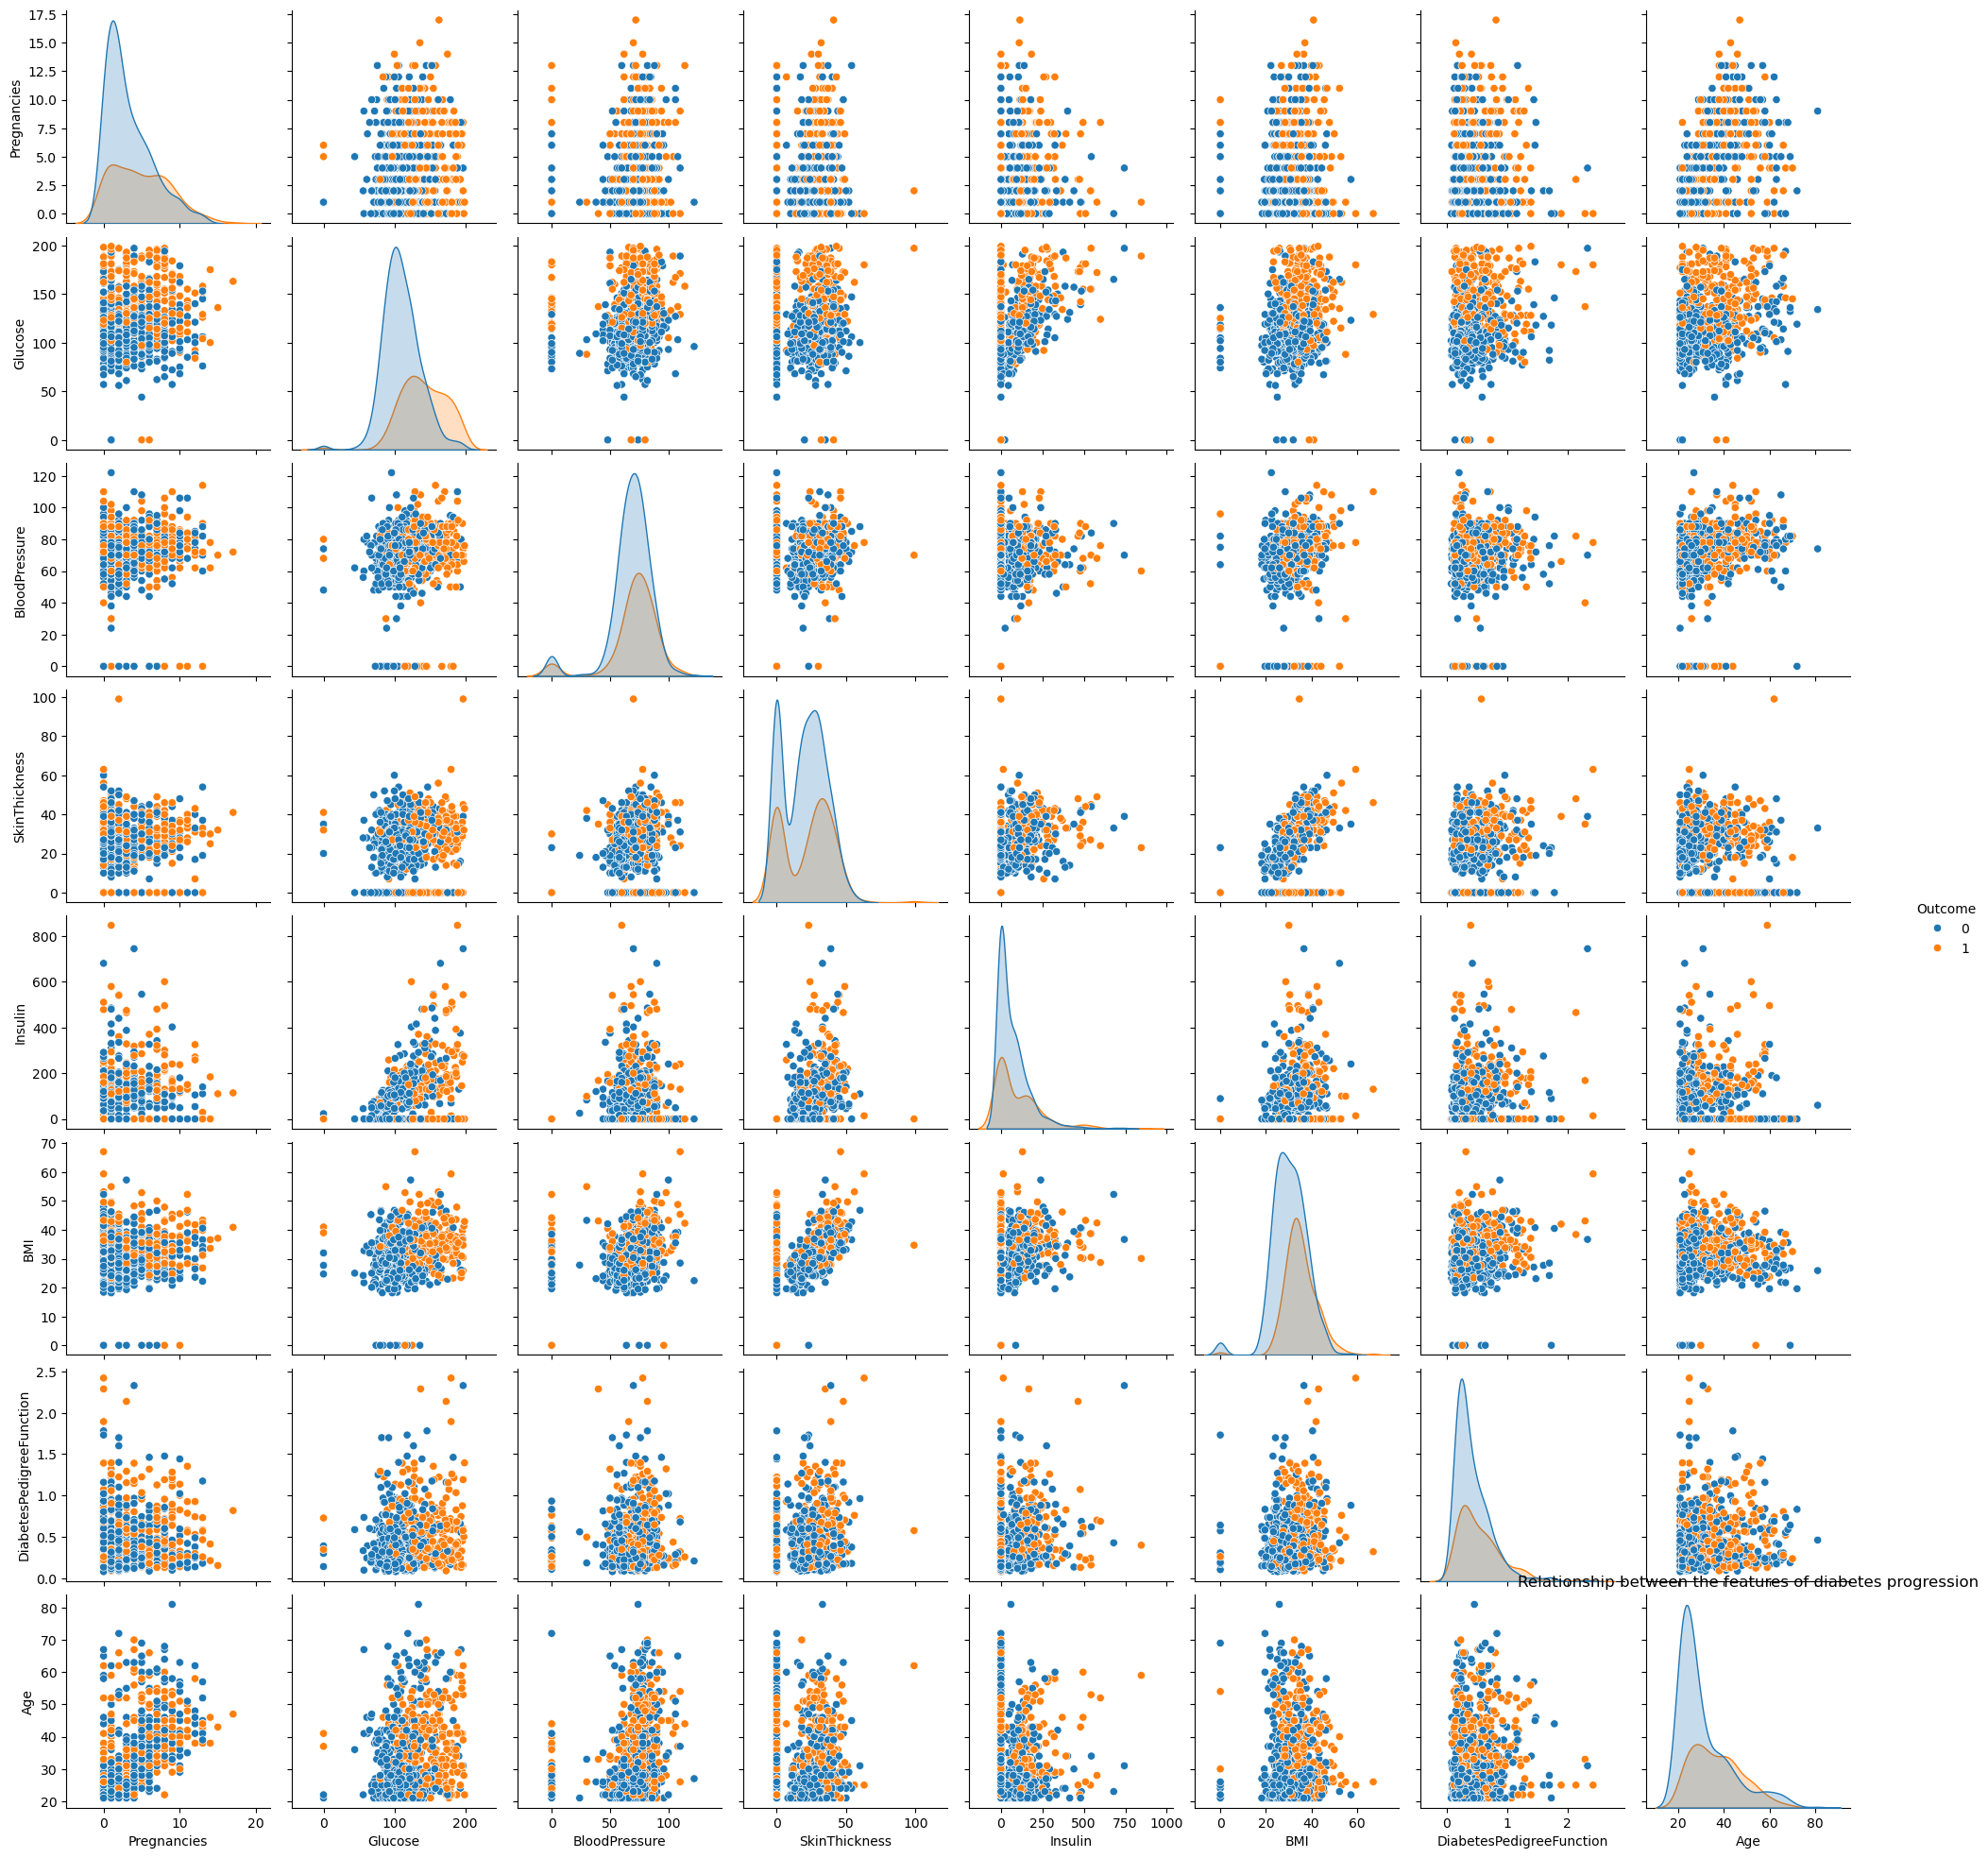

In [14]:
sns.pairplot(data, hue='Outcome')
plt.title('Relationship between the features of diabetes progression')

Text(0.5, 1.0, 'Correlation between features')

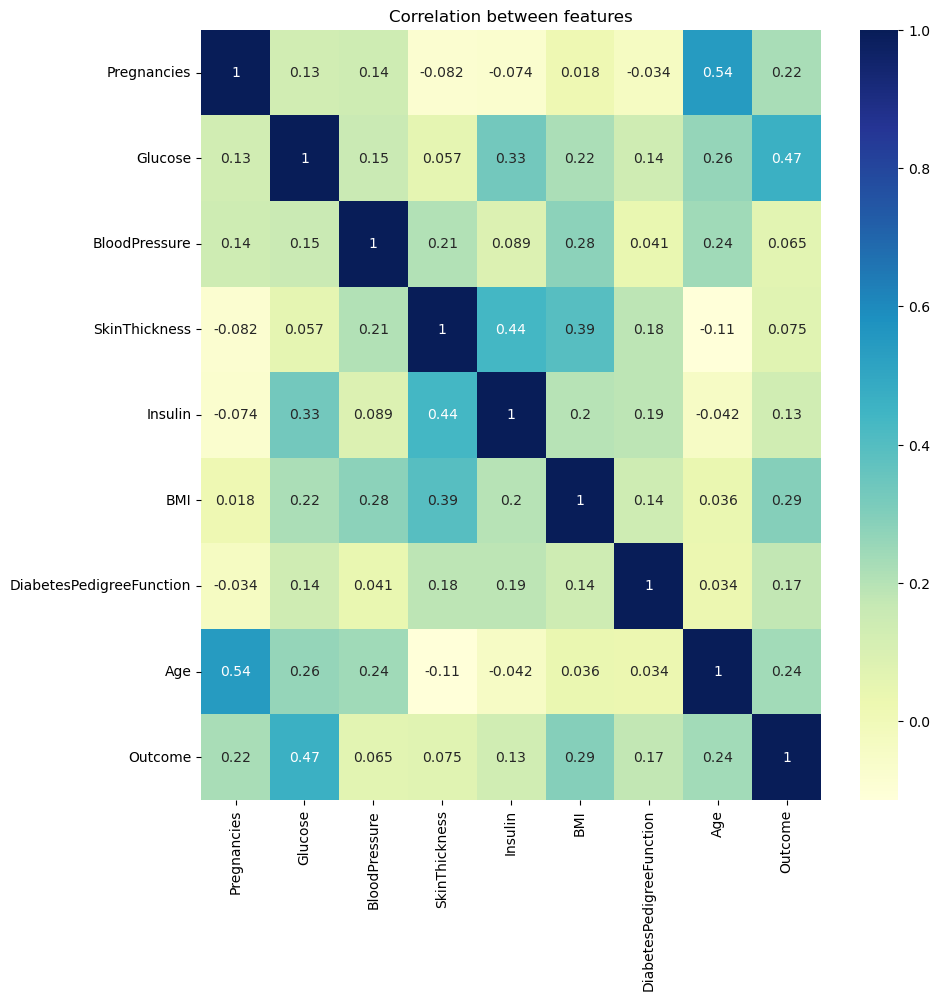

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')
plt.title('Correlation between features')

Text(0.5, 1.0, 'Correlation with target variable')

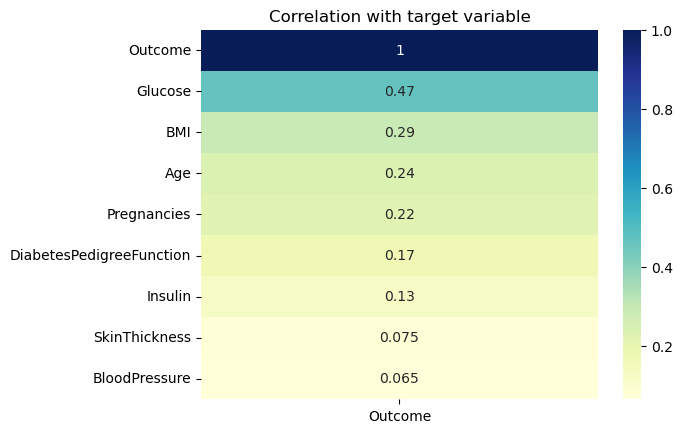

In [16]:
corr = data.corr()[['Outcome']].sort_values(by='Outcome', ascending=False)
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Correlation with target variable')

Differentiate between the independent variables and the dependent variable, and assign them to variables X and Y.

In [18]:
X = data.drop('Outcome', axis=1)
y = data[['Outcome']]

Generate training and test sets comprising 80% and 20% of the data, respectively.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Text(0.5, 1.0, 'Scale distribution of features')

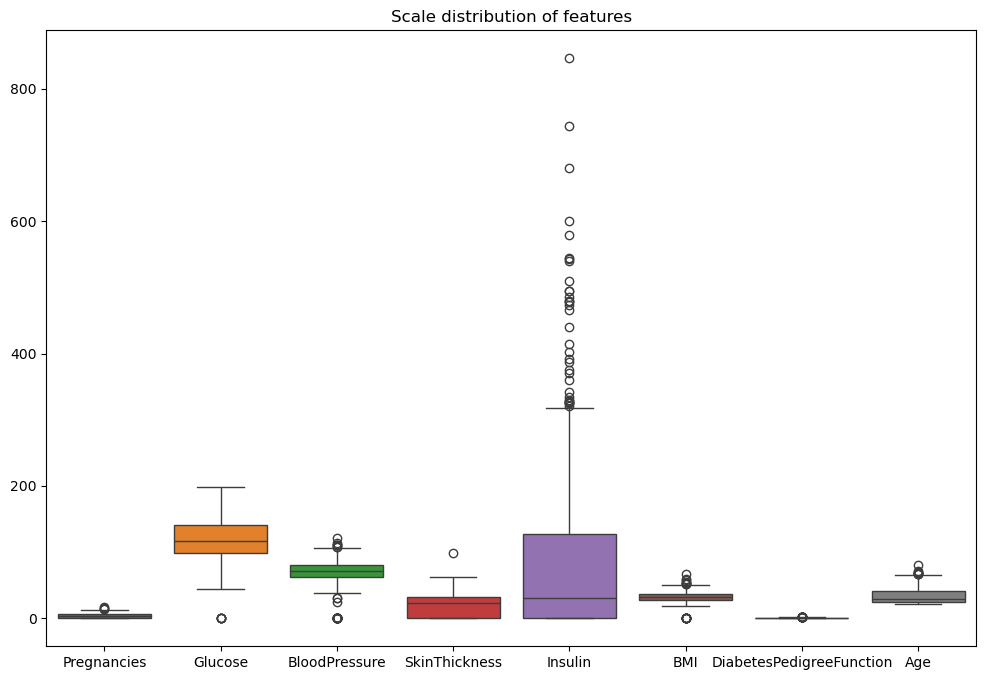

In [20]:
plt.figure(figsize=(12,8))
sns.boxplot(X)
plt.title('Scale distribution of features')

In [9]:
X.describe().loc[['min', 'max']]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
min,0.0,0.0,0.0,0.0,0.0,0.0,0.078,21.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.420,81.0


Let's see if it is Gauss distribution or skewed.

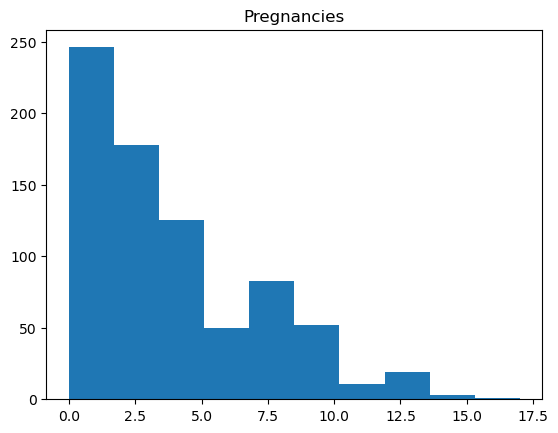

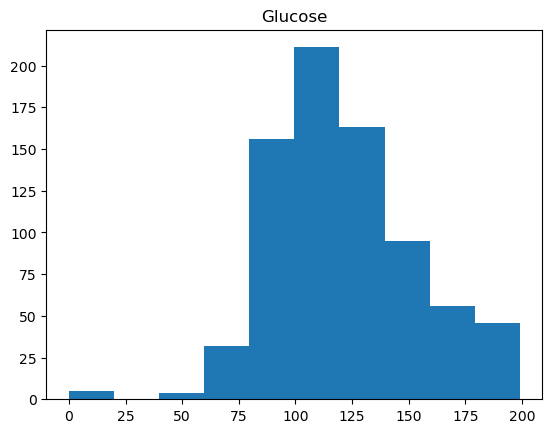

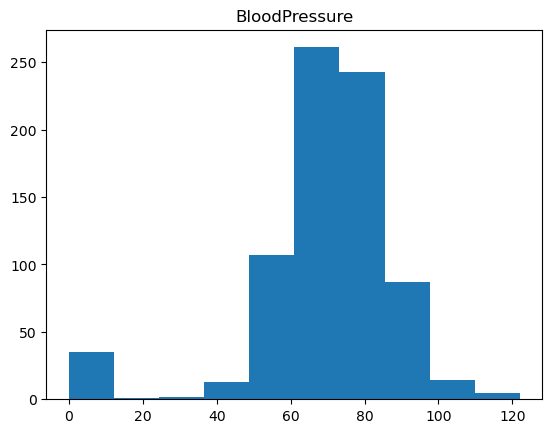

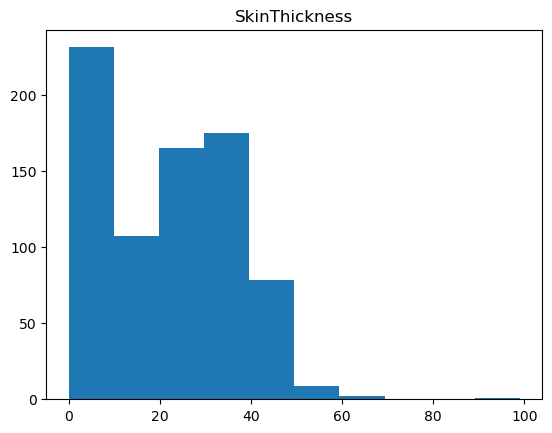

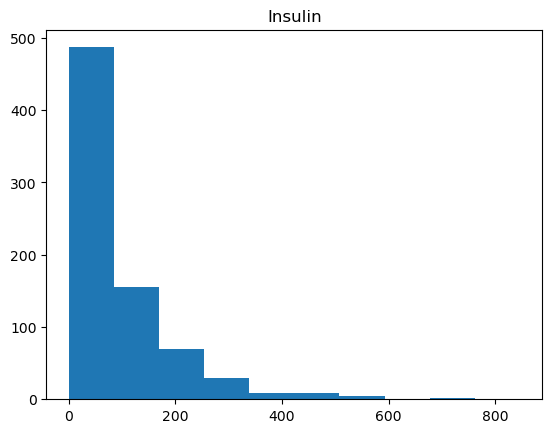

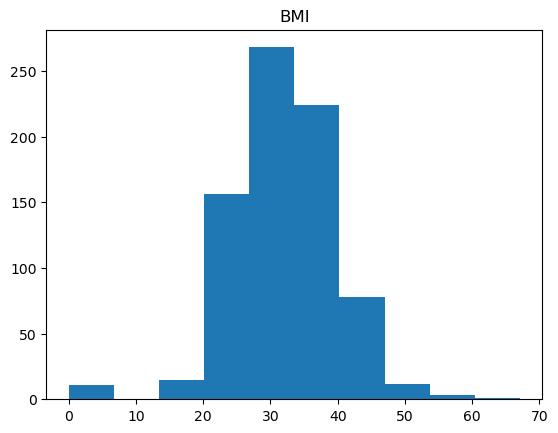

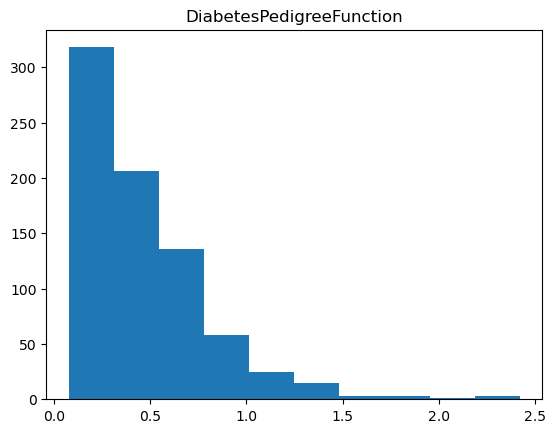

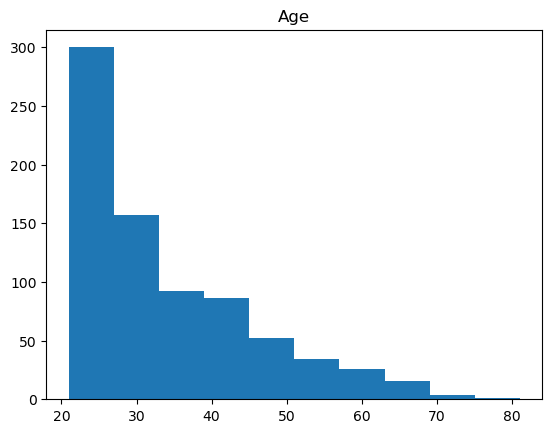

In [21]:
for f in X.columns:
    plt.hist(data=X, x=f)
    plt.title(f)
    plt.show()

Feature Scaling

In [22]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

### Generate a multiple linear regression model using the training set. Use all of the independent variables.

Our target variable is categorical, I can't use linear regression, instead I need to use Logistic regression.

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
print('Intercept: \n', logreg.intercept_)
print('Coefficients: \n', logreg.coef_)

Intercept: 
 [-0.88612313]
Coefficients: 
 [[ 0.21255833  1.07113231 -0.24784154  0.04569683 -0.2008266   0.77815151
   0.23060673  0.42100175]]


In [24]:
y_pred=logreg.predict(X_test)
y_pred.shape

(154,)

In [25]:

y_test.shape
y_test.stack().shape

(154,)

In [27]:
print('Comparing actual outcomes with predicted outcomes.')
result = pd.DataFrame({'Actual': y_test.stack(), 'Predict' : y_pred})
result

Comparing actual outcomes with predicted outcomes.


,,Actual,Predict
668,Outcome,0,0
324,Outcome,0,0
624,Outcome,0,0
690,Outcome,0,0
473,Outcome,0,0
...,...,...,...
355,Outcome,1,1
534,Outcome,0,0
344,Outcome,0,0
296,Outcome,1,0


Check our model with metrics

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [29]:
print(f"Conf matrix: \n{confusion_matrix(y_pred, y_test)}")
print(f"Accuracy score: \n{accuracy_score(y_pred, y_test)}")

Conf matrix: 
[[79 18]
 [20 37]]
Accuracy score: 
0.7532467532467533


[[79 18]
 [20 37]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        97
           1       0.67      0.65      0.66        57

    accuracy                           0.75       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



<Figure size 5000x1500 with 0 Axes>

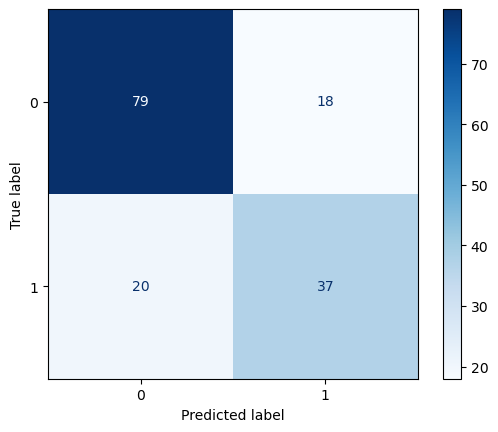

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report 
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

cm = confusion_matrix(y_pred, y_test,labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
plt.figure(figsize=(50, 15))
disp.plot(cmap='Blues')

The accuracy of our model is 75 % and the matrix tells us that 79 items predicted right that don't have diabetes and 37 right that have diabetes.  